In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

In [3]:
#dataset = 'https://raw.githubusercontent.com/vaishnavipatil555/RecommenderSystem/main/reviews_Musical_Instruments.csv'
metadata = 'https://raw.githubusercontent.com/vaishnavipatil555/RecommenderSystem/main/meta_Musical_Instruments.csv'

In [4]:
#df = pd.read_csv(dataset)
meta_df = pd.read_csv(metadata)

In [4]:
#df = df.merge(meta_df, on='asin')

In [5]:
# print(df.shape)
# df.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

NameError: ignored

In [6]:
meta_df.shape

(10261, 9)

In [7]:
meta_df.rename(columns={'asin':'productID'}, inplace=True)

In [8]:
meta_df

,productID,title,price,imUrl,salesRank,categories,related,brand,description
0,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...
1,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...
2,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...
3,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...
4,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...
...,...,...,...,...,...,...,...,...,...
10256,B00JBIVXGC,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,{'Musical Instruments': 628},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B00J4TBMVO', 'B000A6ASSS', '...",Elixir Strings,Elixir Acoustic HD Light Phosphor Bronze Strin...
10257,B00JBIVXGC,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,{'Musical Instruments': 628},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B00J4TBMVO', 'B000A6ASSS', '...",Elixir Strings,Elixir Acoustic HD Light Phosphor Bronze Strin...
10258,B00JBIVXGC,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,{'Musical Instruments': 628},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B00J4TBMVO', 'B000A6ASSS', '...",Elixir Strings,Elixir Acoustic HD Light Phosphor Bronze Strin...
10259,B00JBIVXGC,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,{'Musical Instruments': 628},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B00J4TBMVO', 'B000A6ASSS', '...",Elixir Strings,Elixir Acoustic HD Light Phosphor Bronze Strin...


In [9]:
selected_columns = meta_df[["productID", "title","description"]]
product_descriptions = selected_columns.copy()

In [10]:
product_descriptions = product_descriptions.dropna()
product_descriptions.head()

,productID,title,description
0,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,New generic Studio Microphone Mic Wind Screen ...
1,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,New generic Studio Microphone Mic Wind Screen ...
2,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,New generic Studio Microphone Mic Wind Screen ...
3,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,New generic Studio Microphone Mic Wind Screen ...
4,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,New generic Studio Microphone Mic Wind Screen ...


In [11]:
product_descriptions.shape

(7402, 3)

In [12]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["description"].head(10)

0     New generic Studio Microphone Mic Wind Screen ...
1     New generic Studio Microphone Mic Wind Screen ...
2     New generic Studio Microphone Mic Wind Screen ...
3     New generic Studio Microphone Mic Wind Screen ...
4     New generic Studio Microphone Mic Wind Screen ...
11    This handy sustain pedal/FS controller hooks u...
12    This handy sustain pedal/FS controller hooks u...
13    This handy sustain pedal/FS controller hooks u...
14    This handy sustain pedal/FS controller hooks u...
15    This handy sustain pedal/FS controller hooks u...
Name: description, dtype: object

In [13]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["description"])
X1

<500x956 sparse matrix of type '<class 'numpy.float64'>'
	with 16437 stored elements in Compressed Sparse Row format>

# KMeans Clustering

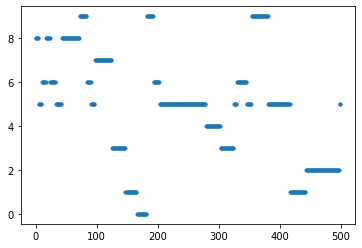

In [32]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [33]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [34]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 strings
 martin
 acoustic
 guitar
 bronze
 hardshell
 alloy
 case
 les
 paul
Cluster 1:
 tortex
 picks
 dunlop
 pick
 gamespot
 carefully
 review
 50
 musicians
 characteristic
Cluster 2:
 string
 gold
 kyser
 capo
 12
 black
 finishes
 firmly
 finished
 feedback
Cluster 3:
 quick
 change
 capo
 hand
 kyser
 guitar
 doesn
 tensioned
 strong
 clamps
Cluster 4:
 distortion
 ve
 overdrive
 ds
 rock
 pedal
 boss
 guitarists
 tone
 knobs
Cluster 5:
 10
 cables
 solidbody
 gigbag
 electric
 waves
 paul
 les
 epiphone
 hard
Cluster 6:
 crybaby
 wah
 original
 pedal
 powering
 hot
 potz
 boost
 volt
 optional
Cluster 7:
 xlr
 cable
 microphone
 braided
 male
 female
 15ft
 pattern
 response
 cables
Cluster 8:
 input
 phone
 xlr3m
 balanced
 adapt
 adaptor
 psr
 insert
 designed
 audio
Cluster 9:
 banjo
 blk
 mand
 capo
 kyser
 zero
 finish
 fender
 filter
 fingering


In [31]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [33]:
show_recommendations("microphone")

Cluster 8:
 xlr
 microphone
 15ft
 male
 female
 cable
 mini
 audio
 high
 mic


In [34]:
show_recommendations("guitar")

Cluster 7:
 overdrive
 amp
 boss
 effects
 distortion
 overdriven
 pedal
 classic
 super
 attack


In [35]:
show_recommendations("tabla")

Cluster 7:
 overdrive
 amp
 boss
 effects
 distortion
 overdriven
 pedal
 classic
 super
 attack


In [37]:
km = model.fit(X)
clusters = km.labels_.tolist()
clustered_data={'productID':product_descriptions1['productID'], 'Title':product_descriptions1['title'],'Cluster':clusters}
frame=pd.DataFrame(clustered_data, columns=['productID','Title','Cluster'])
frame

,productID,Title,Cluster
0,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,9
1,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,9
2,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,9
3,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,9
4,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,9
...,...,...,...
819,B0002D0CEO,"Tortex Guitar Pick, .50 Red, Pack of 12 (418P.50)",2
820,B0002D0CEO,"Tortex Guitar Pick, .50 Red, Pack of 12 (418P.50)",2
821,B0002D0CEO,"Tortex Guitar Pick, .50 Red, Pack of 12 (418P.50)",2
847,B0002D0CGM,"Dunlop Nylon Standard Picks, Cream .46mm, Qty 12",5


# DBSCAN Clustering

In [29]:
X=X1

dbscan = DBSCAN()
db = dbscan.fit(X)
clusters = db.labels_.tolist()
y_dbscan = dbscan.fit_predict(X)
clustered_data={'productID':product_descriptions1['productID'], 'Title':product_descriptions1['title'],'Cluster':clusters}
frame=pd.DataFrame(clustered_data, columns=['productID','Title','Cluster'])
frame

,productID,Title,Cluster
0,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,0
1,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,0
2,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,0
3,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,0
4,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,0
...,...,...,...
819,B0002D0CEO,"Tortex Guitar Pick, .50 Red, Pack of 12 (418P.50)",41
820,B0002D0CEO,"Tortex Guitar Pick, .50 Red, Pack of 12 (418P.50)",41
821,B0002D0CEO,"Tortex Guitar Pick, .50 Red, Pack of 12 (418P.50)",41
847,B0002D0CGM,"Dunlop Nylon Standard Picks, Cream .46mm, Qty 12",-1
